# WEB MINING : Prédiction du prix des vehicules
###### ABDOUL HABOU 

In [3]:
# import des librairies dont nous aurons besoin
import bs4
from urllib import request
import requests
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

##  Récupération des données dans le site de vente des vehicules lacentrale.fr

### Les données ont été recuperées dans un site web de vente de vehicules "lacentral.fr" à travers le web scraping

### CHARGEMENT, UTILISATION ET NETTOYAGE DES DONNEES DU FICHIER ENREGISTRES

In [10]:
# Chargement des données
data = pd.read_csv("Dataset_prix_voiture_la_centrale.csv")

In [11]:
# Suppression colonnes inutiles
data = data.drop('Unnamed: 0', axis=1)

In [12]:
# Compter le nombre de lignes dupliquées
data.duplicated().sum()

1028

In [13]:
# Suppression des doublons
data.drop_duplicates(keep='first')
data = data.reset_index()
data = data.drop('index', axis=1)
data.head()

,titre,marque,modele,annee,kilometrage,boite_vitesse,carburant,prix
0,MERCEDES CLASSE C V SW,MERCEDES,2.0 200 D 163 AMG LINE,2023,25 630 km,Automatique,Diesel,51 680 €
1,MERCEDES GLE COUPE II,MERCEDES,2.0 350 194 AMG LINE,2022,30 229 km,Automatique,NaN,97 090 €
2,MERCEDES CLA SHOOTING BRAKE phase 2,MERCEDES,2.1 200 D 136 INSPIRATION,2020,63 506 km,Automatique,Diesel,29 360 €
3,MERCEDES CLASSE C IV,MERCEDES,1.6 200 D 136 FASCINATION,2017,98 280 km,Manuelle,Diesel,26 790 €
4,MERCEDES CLASSE E IV CABRIOLET,MERCEDES,1.8 250 204 EXECUTIVE,2012,109 000 km,Automatique,Essence,25 060 €


In [14]:
# Verification des types des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   titre          5122 non-null   object
 1   marque         5122 non-null   object
 2   modele         5122 non-null   object
 3   annee          5122 non-null   int64 
 4   kilometrage    5122 non-null   object
 5   boite_vitesse  5122 non-null   object
 6   carburant      5099 non-null   object
 7   prix           5122 non-null   object
dtypes: int64(1), object(7)
memory usage: 320.2+ KB


In [15]:
# Preformatage et traitement des types
data['prix'] = data['prix'].str.replace('€', '')
data['prix'] = data['prix'].str.replace(' ', '')

data['kilometrage'] = data['kilometrage'].str.replace('km', '')
data['kilometrage'] = data['kilometrage'].str.replace(' ', '')

data = data.astype({ 'prix' : float, 'kilometrage': float})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5122 entries, 0 to 5121
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   titre          5122 non-null   object 
 1   marque         5122 non-null   object 
 2   modele         5122 non-null   object 
 3   annee          5122 non-null   int64  
 4   kilometrage    5122 non-null   float64
 5   boite_vitesse  5122 non-null   object 
 6   carburant      5099 non-null   object 
 7   prix           5122 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 320.2+ KB


In [16]:
# Description de la base de données
data.describe()

,annee,kilometrage,prix
count,5122.000000,5122.000000,5.122000e+03
mean,2018.697579,60324.848301,4.657464e+04
std,7.287262,51554.167976,6.960299e+04
min,1955.000000,1.000000,2.400000e+03
25%,2018.000000,20335.000000,2.082000e+04
50%,2020.000000,50583.000000,2.991500e+04
75%,2022.000000,87229.250000,4.245000e+04
max,2024.000000,365166.000000,1.011380e+06


In [17]:
# Compter les données aberrantes
data.isnull().sum()

titre             0
marque            0
modele            0
annee             0
kilometrage       0
boite_vitesse     0
carburant        23
prix              0
dtype: int64

In [18]:
# Remplir les valeurs manquantes par les valeurs qui se repetent les plus
data = data.fillna(data.mode().iloc[0])
data.isnull().sum()

titre            0
marque           0
modele           0
annee            0
kilometrage      0
boite_vitesse    0
carburant        0
prix             0
dtype: int64

## Visualisation des données du dataset

In [19]:
# Chargement des bibliothèques necessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

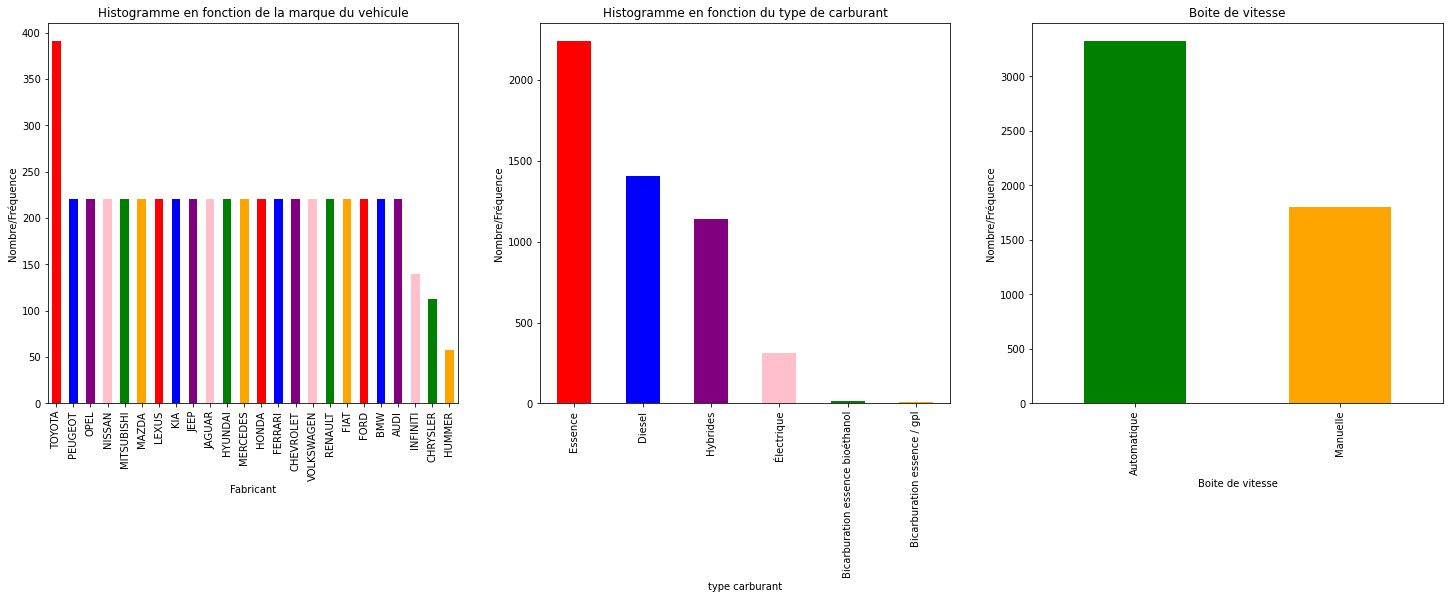

In [20]:
# Impression des histogrammes pour des variables qualitatives
plt.figure(figsize=(25, 7))
color = ['red', 'blue', 'purple', 'pink', 'green', 'orange']
plt.subplot(1,3,1)
plt1 = data.marque.value_counts().plot(kind = 'bar', color=color)
plt.title('Histogramme en fonction de la marque du vehicule')
plt1.set(xlabel = 'Fabricant', ylabel='Nombre/Fréquence')

plt.subplot(1,3,2)
plt1 = data.carburant.value_counts().plot(kind = 'bar', color=color)
plt.title('Histogramme en fonction du type de carburant')
plt1.set(xlabel = 'type carburant', ylabel='Nombre/Fréquence')

plt.subplot(1,3,3)
plt1 = data.boite_vitesse.value_counts().plot(kind = 'bar', color=color[4:])
plt.title('Boite de vitesse')
plt1.set(xlabel = 'Boite de vitesse', ylabel='Nombre/Fréquence')

plt.show()

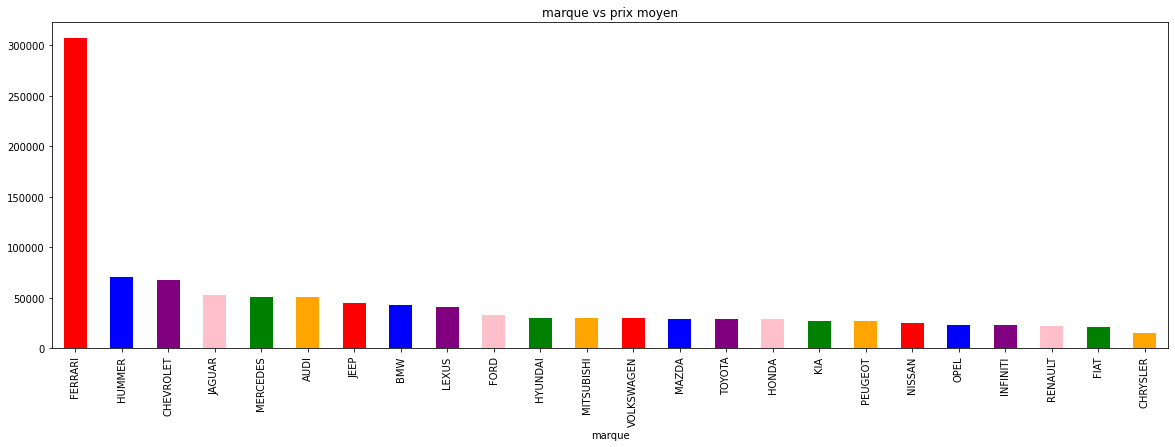

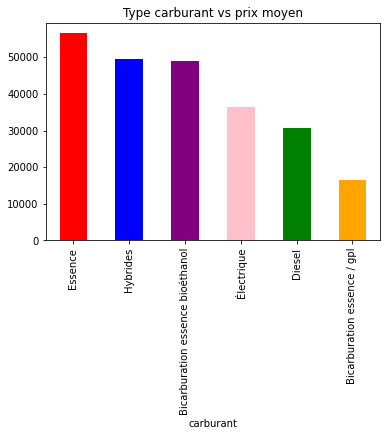

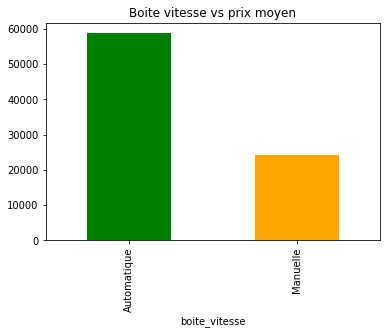

In [21]:
#Analyse bivarié des variables qualitatives
plt.figure(figsize=(20, 6))

df = data.groupby(['marque'])['prix'].mean().sort_values(ascending = False)
df.plot.bar(color=color)
plt.title('marque vs prix moyen')
plt.show()

df = data.groupby(['carburant'])['prix'].mean().sort_values(ascending = False)
df.plot.bar(color=color)
plt.title('Type carburant vs prix moyen')
plt.show()

df = data.groupby(['boite_vitesse'])['prix'].mean().sort_values(ascending = False)
df.plot.bar(color=color[4:])
plt.title('Boite vitesse vs prix moyen')
plt.show()

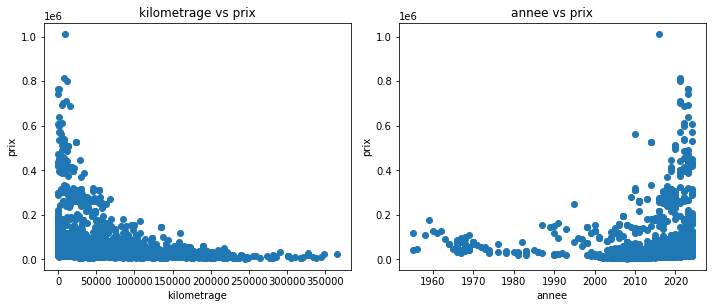

In [22]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['prix'])
    plt.title(x+' vs prix')
    plt.ylabel('prix')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('kilometrage', 1)
scatter('annee', 2)

plt.tight_layout()

In [23]:
### Correlation entre variable quali et prix
import statsmodels.api as sm
def ANOVA(x, data=data):
    model = sm.formula.ols('prix ~ {}'.format(x), data=data)
    results = model.fit()
    table = sm.stats.anova_lm(results)
    return table
print("ANOVA modele~prix \n", ANOVA("modele"), "\n")
print("ANOVA marque~prix \n", ANOVA("marque"), "\n")
print("ANOVA boite_vitesse~prix \n", ANOVA("boite_vitesse"), "\n")
print("ANOVA carburant~prix \n", ANOVA("carburant"), "\n")

ANOVA modele~prix 
               df        sum_sq       mean_sq          F  PR(>F)
modele    2117.0  2.396006e+13  1.131793e+10  40.045339     0.0
Residual  3004.0  8.490143e+11  2.826279e+08        NaN     NaN 

ANOVA marque~prix 
               df        sum_sq       mean_sq           F  PR(>F)
marque      23.0  1.649004e+13  7.169583e+11  439.360209     0.0
Residual  5098.0  8.319036e+12  1.631823e+09         NaN     NaN 

ANOVA boite_vitesse~prix 
                    df        sum_sq       mean_sq           F        PR(>F)
boite_vitesse     1.0  1.396236e+12  1.396236e+12  305.333773  1.862334e-66
Residual       5120.0  2.341284e+13  4.572820e+09         NaN           NaN 

ANOVA carburant~prix 
                df        sum_sq       mean_sq          F        PR(>F)
carburant     5.0  6.196688e+11  1.239338e+11  26.211685  3.120277e-26
Residual   5116.0  2.418941e+13  4.728187e+09        NaN           NaN 



### Cette sortie du test ANOVA nous permet de conclure que les variables quali n'ont pas trop d'impact sur la prédiction du prix

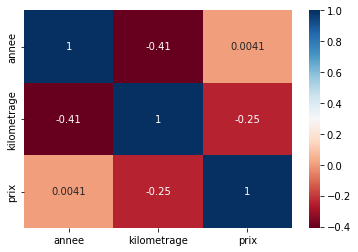

In [24]:
# Graphique pour voir la corrélation entre les variables quanti
sns.heatmap(data.corr(), annot=True, cmap="RdBu")
plt.show()

In [20]:
# Distribution du prix en fonction du type de crburant et de la boite de vitesse
data.pivot_table(values='prix', index = 'carburant', columns= 'boite_vitesse')

boite_vitesse,Automatique,Manuelle
carburant,,
Bicarburation essence / gpl,25620.000000,14883.333333
Bicarburation essence bioéthanol,54734.166667,26360.000000
Diesel,38080.810474,21086.622517
Essence,89536.706532,25429.038128
Hybrides,49766.582507,36552.187500
Électrique,36522.596154,NaN


In [25]:
data.columns

Index(['titre', 'marque', 'modele', 'annee', 'kilometrage', 'boite_vitesse',
       'carburant', 'prix'],
      dtype='object')

## Preparation des données 

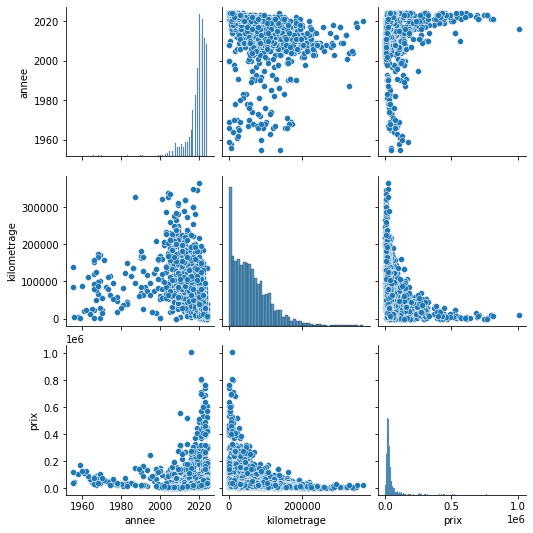

In [26]:
### après analyse il convient de retenir certaines caracteristiques
caracteristique = ['marque', 'annee', 'kilometrage', 'boite_vitesse', 'carburant', 'prix']
new_data = data[caracteristique]
sns.pairplot(new_data)
plt.show()

In [27]:
# Definition de la fonction de mappage des données
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

#Transformation des variables quali à travers la fonction de mappage
new_data = dummies('marque',new_data)
new_data = dummies('boite_vitesse',new_data)
new_data = dummies('carburant',new_data)

new_data.head()

,annee,kilometrage,prix,BMW,CHEVROLET,CHRYSLER,FERRARI,FIAT,FORD,HONDA,...,PEUGEOT,RENAULT,TOYOTA,VOLKSWAGEN,Manuelle,Bicarburation essence bioéthanol,Diesel,Essence,Hybrides,Électrique
0,2023,25630.0,51680.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2022,30229.0,97090.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2020,63506.0,29360.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2017,98280.0,26790.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,2012,109000.0,25060.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split

In [25]:
# Division des données en variable predictive(X) et variable à prédire(x)
y = new_data['prix']
X = new_data.drop(['prix'],axis=1)
colonnes = X.columns
colonnes

Index(['annee', 'kilometrage', 'BMW', 'CHEVROLET', 'CHRYSLER', 'FERRARI',
       'FIAT', 'FORD', 'HONDA', 'HUMMER', 'HYUNDAI', 'INFINITI', 'JAGUAR',
       'JEEP', 'KIA', 'LEXUS', 'MAZDA', 'MERCEDES', 'MITSUBISHI', 'NISSAN',
       'OPEL', 'PEUGEOT', 'RENAULT', 'TOYOTA', 'VOLKSWAGEN', 'Manuelle',
       'Bicarburation essence bioéthanol', 'Diesel', 'Essence', 'Hybrides',
       'Électrique'],
      dtype='object')

In [26]:
## Subdivision des données en données de test et données d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4097, 31)
x test:  (1025, 31)
y train:  (4097,)
y test:  (1025,)


## Création/Evaluation du modèle

### Choix des modeles de regression

#### 1. Régression linéaire
#### 2. Random Forest Regression
#### 3. Gradient Boosting Regression

In [27]:
## Définition des métriques d'évaluation de score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [28]:
CV = []
R2_train = []
R2_test = []
Precision = []
# Définition de la fonction générique pour créer, entrainer et sauvegarder notre modele
def car_pred_model(model, model_name):
    # Entrainement du modele
    model.fit(X_train,y_train)
            
    # Calcul du R² pour l'ensemble de données d'entrainement
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Calcul du R² pour l'ensemble de données de test
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Moyenne R² de l'ensemble d'entrainement en utilisant Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    Precision.append(round(model.score(X_test,y_test), 2))
    
    # Affichage des résultats
    print("Train R²-score :",round(R2_train_model,2))
    print("Test R²-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Précision du modèle: ", model.score(X_test,y_test))
    
    # Affichage des graphiques 
    # Tracé résiduel des données d'entrainement
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Tracé résiduel des échantillons d\'entrainement')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')

    # Nuage de points des données entrainement et test
    ax[1].set_title('test réelles vs test prédites')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('données test réelles')
    ax[1].set_ylabel('données test prédites')
    
    #Enregistrer le modele
    pickle.dump(model, open(model_name, 'wb'))

    plt.show()

### 1. REGRESSION LINEAIRE 

Train R²-score : 0.68
Test R²-score : 0.81
Train CV scores : [0.7132273  0.6668426  0.64059828 0.66786852 0.71432141]
Train CV mean : 0.68
Précision du modèle:  0.8087458940708738


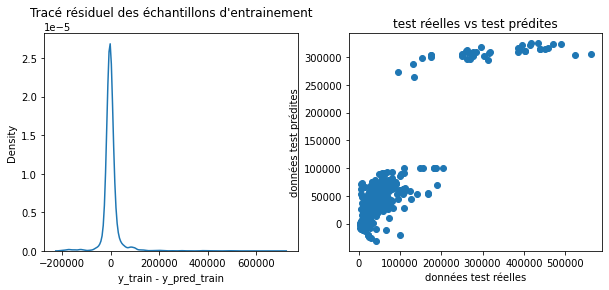

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

### 2. RANDOM FOREST REGRESSION

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Nombre d’arbres dans la forêt aléatoire
n_estimators=list(range(500,1000,100))
# Nombre maximum de niveaux dans une arborescence
max_depth=list(range(4,9,4))
# Nombre minimal d’échantillons requis pour fractionner un nœud interne
min_samples_split=list(range(4,9,2))
# Nombre minimum d’échantillons requis pour se trouver sur un nœud feuille.
min_samples_leaf=[1,2,5,7]
# Nombre de features à prendre en compte à chaque split
max_features=[5,'sqrt']

# Dictionnaire d’hyperparamètres
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

RFR = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

Train R²-score : 0.85
Test R²-score : 0.88
Train CV scores : [0.82444485 0.80015178 0.76742711 0.74545329 0.8403163 ]
Train CV mean : 0.8
Précision du modèle:  0.8804085258980059


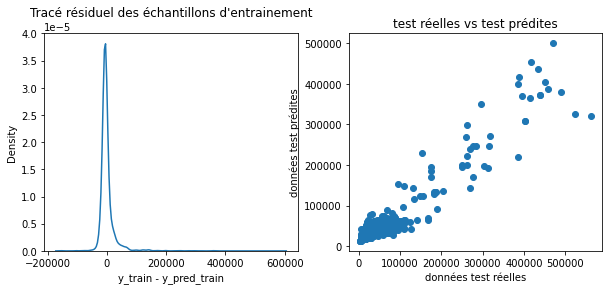

RandomForestRegressor(max_depth=8, max_features=5, min_samples_split=6,
                      n_estimators=900)


In [31]:
car_pred_model(RFR,'random_forest.pkl')
print(RFR.best_estimator_)

###  3. GRADIENT BOOSTING

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Vitesse à laquelle la correction est effectuée
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Nombre d’arbres dans Gradient boosting
n_estimators=list(range(500,1000,100))
# Nombre maximum de niveaux dans une arborescence
max_depth=list(range(4,9,4))
# Nombre minimal d’échantillons requis pour fractionner un nœud interne
min_samples_split=list(range(4,9,2))
# Nombre minimum d’échantillons requis pour se trouver sur un nœud feuille.
min_samples_leaf=[1,2,5,7]
# Nombre de features à prendre en compte à chaque split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

Gradient = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R²-score : 0.94
Test R²-score : 0.9
Train CV scores : [0.85886797 0.87600032 0.83678304 0.79164669 0.84733083]
Train CV mean : 0.84
Précision du modèle:  0.9043171681484377


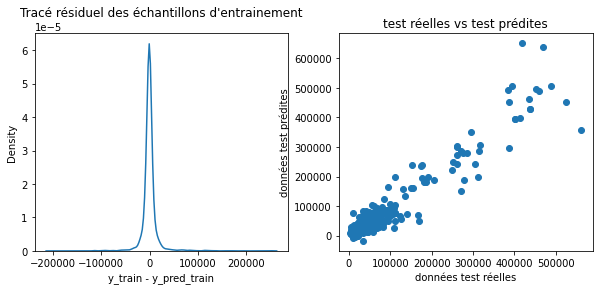

In [33]:
car_pred_model(Gradient,"gradient_boosting.pkl")

In [34]:
Technique = ["LinearRegression","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV, 'Précision': Precision})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),Précision
0,LinearRegression,0.68,0.81,0.68,0.81
1,RandomForestRegressor,0.85,0.88,0.80,0.88
2,GradientBoostingRegressor,0.94,0.90,0.84,0.90


#### Inférence :
*R-squared * - 0.81, 0.88, 0.90 - `90%` de la variance ont été expliqué pour le cas de GradientBoosting.
*La précision du modèle qui est à * `81%` minimum pour les modèles entrainés

## CHARGEMENT MODELE ENTRAINE POUR PREDICTION

In [35]:
with open("Linear_regressor.pkl", 'rb') as file:
    modele = pickle.load(file)

In [42]:
# Nouvelles données à prédire
new_data = pd.DataFrame({
    'annee': [2022, 2022],
    'kilometrage': [10000, 9000],
    'boite_vitesse': ['Manuelle', 'Automatique'],
    'carburant' : ['Diesel', 'Essence'],
    'marque': ['HONDA', 'TOYOTA'],
})
print(new_data)
## Création d'une fonction de mappage afin de faire corroborer les données d'entrer
def fonction_map_pred(new_data = new_data, colonnes = colonnes):
    prediction = pd.DataFrame(columns = colonnes)
    for i in range(0, len(new_data)):
        for element in new_data:
            if new_data[element].dtype == 'object':
                if new_data[element][i] in prediction.columns:
                    prediction[new_data[element][i]][i] = 1.0
            else :
                prediction[element] = new_data[element]
    prediction = prediction.fillna(0.0)
    return prediction

fonction_map_pred()

   annee  kilometrage boite_vitesse carburant  marque
0   2022        10000      Manuelle    Diesel   HONDA
1   2022         9000   Automatique   Essence  TOYOTA


,annee,kilometrage,BMW,CHEVROLET,CHRYSLER,FERRARI,FIAT,FORD,HONDA,HUMMER,...,PEUGEOT,RENAULT,TOYOTA,VOLKSWAGEN,Manuelle,Bicarburation essence bioéthanol,Diesel,Essence,Hybrides,Électrique
0,2022,10000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2022,9000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [37]:
modele.predict(fonction_map_pred())
new_prix = [round(p) for p in modele.predict(fonction_map_pred())]
new_prix

[36802, 35265]

In [41]:
for i in range(0, len(new_data)):
    print("Le prix de la {} {} {} peut-être {}€".format(new_data['marque'][i], new_data['annee'][i], 
                                            new_data['carburant'][i], new_prix[i] ))

Le prix de la HONDA 2022 Diesel peut-être 36802€
Le prix de la TOYOTA 2022 Essence peut-être 35265€
